In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

sns.set(rc={'figure.figsize':(12,8)})

In [74]:
df = pd.read_csv('new_york_citi_bike.csv')

In [75]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,327,00:02.0,05:29.3,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,39213,Subscriber,1968,1
1,1145,00:04.1,19:09.8,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,21257,Customer,1969,0
2,1293,00:07.3,21:40.8,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,15242,Customer,1969,0
3,1753,00:08.1,29:21.5,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,38760,Subscriber,1990,1
4,613,00:12.9,10:26.2,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,32094,Subscriber,1992,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
tripduration               1048575 non-null int64
starttime                  1048575 non-null object
stoptime                   1048575 non-null object
start station id           1048575 non-null int64
start station name         1048575 non-null object
start station latitude     1048575 non-null float64
start station longitude    1048575 non-null float64
end station id             1048575 non-null int64
end station name           1048575 non-null object
end station latitude       1048575 non-null float64
end station longitude      1048575 non-null float64
bikeid                     1048575 non-null int64
usertype                   1048575 non-null object
birth year                 1048575 non-null int64
gender                     1048575 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 120.0+ MB


In [77]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.008363e+03,1.654709e+03,4.073735e+01,-7.398213e+01,1.648128e+03,4.073698e+01,-7.398234e+01,2.961550e+04,1.980670e+03,1.167502e+00
std,1.107315e+04,1.481409e+03,3.024812e-02,2.016519e-02,1.481127e+03,3.014928e-02,2.023096e-02,7.699267e+03,1.210761e+01,5.571929e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.404282e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.860000e+02,3.770000e+02,4.071755e+01,-7.399596e+01,3.760000e+02,4.071749e+01,-7.399662e+01,2.508500e+04,1.970000e+03,1.000000e+00
50%,6.570000e+02,5.080000e+02,4.073705e+01,-7.398584e+01,5.070000e+02,4.073653e+01,-7.398627e+01,3.078300e+04,1.983000e+03,1.000000e+00
75%,1.139000e+03,3.295000e+03,4.075725e+01,-7.397121e+01,3.295000e+03,4.075680e+01,-7.397121e+01,3.526100e+04,1.990000e+03,2.000000e+00
max,2.904620e+06,3.811000e+03,4.081439e+01,-7.390774e+01,3.811000e+03,4.081439e+01,-7.390774e+01,4.097200e+04,2.003000e+03,2.000000e+00


In [78]:
df['start station name'].nunique()

791

## Data Cleaning

<font color = 'green' size = '3'>Based on our Hypothesis, we have decided to remove starttime, stoptime and bikeid.<br>

In [79]:
columns_todrop = ['starttime','stoptime','bikeid']

df.drop(columns = columns_todrop, axis = 1, inplace = True)

In [80]:
df.shape

(1048575, 12)

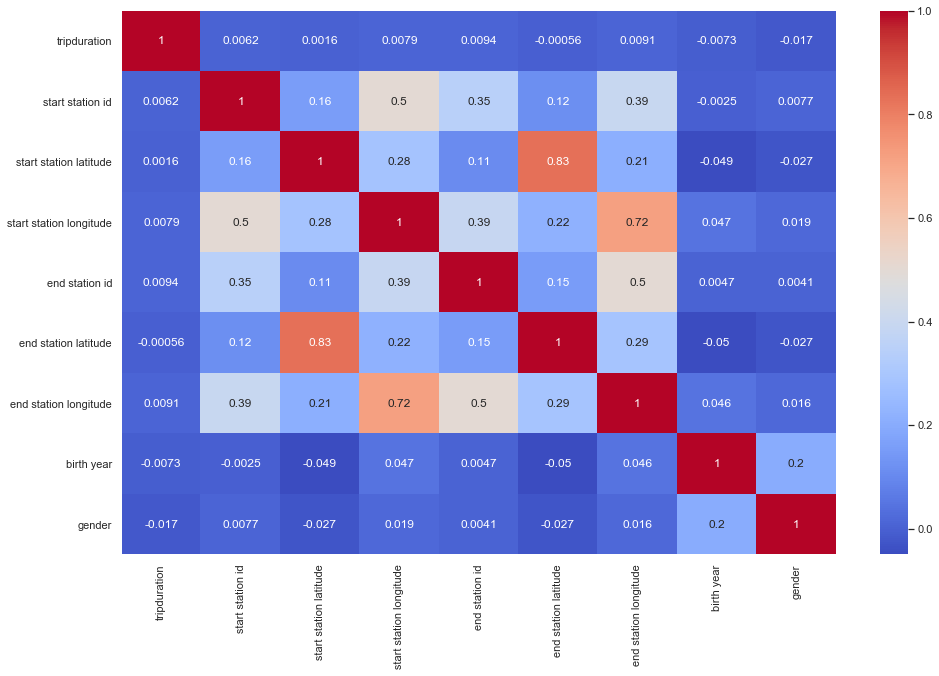

In [81]:
feat_corr = df.corr()

plt.figure( figsize = (16,10))
sns.heatmap(feat_corr, cmap = 'coolwarm',annot = True)

In [82]:
df.isnull().sum()

tripduration               0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [83]:
duplicate_df = df[df.duplicated()]
print('Duplicate Rows: ', duplicate_df.shape[0])

Duplicate Rows:  4408


### Trip Duration - Feature Extraction

<font color = 'green' size = '3'> For convenience, we will be converting tripduration from seconds to minutes and round off to 3 decimal places.<br>
   

In [84]:
df['tripduration'] = df['tripduration']/60

In [85]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,usertype,birth year,gender
0,5.450000,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,Subscriber,1968,1
1,19.083333,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,Customer,1969,0
2,21.550000,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,Customer,1969,0
3,29.216667,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,Subscriber,1990,1
4,10.216667,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,Subscriber,1992,1


In [86]:
df['tripduration'] = df['tripduration'].round(3)

In [87]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,usertype,birth year,gender
0,5.450,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,Subscriber,1968,1
1,19.083,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,Customer,1969,0
2,21.550,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,Customer,1969,0
3,29.217,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,Subscriber,1990,1
4,10.217,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,Subscriber,1992,1


### Latitude and Longitude - Feature Extraction

<font color = 'green' size = '3'> We will be checking if the latitude and longitude values conform to the standard values  - (Latitude = -90 to +90, Longitude = -180 to +180).<br>

In [88]:
df['start station latitude'].describe()

count    1.048575e+06
mean     4.073735e+01
std      3.024812e-02
min      4.065540e+01
25%      4.071755e+01
50%      4.073705e+01
75%      4.075725e+01
max      4.081439e+01
Name: start station latitude, dtype: float64

In [89]:
df['end station latitude'].describe()

count    1.048575e+06
mean     4.073698e+01
std      3.014928e-02
min      4.065540e+01
25%      4.071749e+01
50%      4.073653e+01
75%      4.075680e+01
max      4.081439e+01
Name: end station latitude, dtype: float64

In [90]:
df['start station longitude'].describe()

count    1.048575e+06
mean    -7.398213e+01
std      2.016519e-02
min     -7.402535e+01
25%     -7.399596e+01
50%     -7.398584e+01
75%     -7.397121e+01
max     -7.390774e+01
Name: start station longitude, dtype: float64

In [91]:
df['end station longitude'].describe()

count    1.048575e+06
mean    -7.398234e+01
std      2.023096e-02
min     -7.404282e+01
25%     -7.399662e+01
50%     -7.398627e+01
75%     -7.397121e+01
max     -7.390774e+01
Name: end station longitude, dtype: float64

In [92]:
start_lat = np.where((df['start station latitude']< -90) | (df['start station latitude'] > 90))

In [93]:
start_lat

(array([], dtype=int64),)

In [94]:
start_long = np.where((df['start station longitude']< -180) | (df['start station longitude'] > 180))

In [95]:
start_long

(array([], dtype=int64),)

In [96]:
end_lat = np.where((df['end station latitude']< -90) | (df['end station latitude'] > 90))

In [97]:
end_lat

(array([], dtype=int64),)

In [98]:
end_long = np.where((df['end station longitude']< -180) | (df['end station longitude'] > 180))

In [99]:
end_long

(array([], dtype=int64),)

<font color = 'green' size = '3'>Considering the city of New York, we have to keep in mind the longitude and latitude boundaries of the city. After some domain research, we found out that,<br>

<b>Longitude Boundary - (-74.03, -73.75)</b><br>


<b>Latitude Boundary - (40.63, 40.85)</b><br>
    
Hence, we need to remove values outside this boundary.

In [100]:
nyc_boundary = {'min_lng':-74.263242,
              'min_lat':40.573143,
              'max_lng':-72.986532, 
              'max_lat':41.709555}

In [101]:
outside_nyc = np.where(~((df['start station longitude'] >= nyc_boundary['min_lng'] ) & (df['start station longitude'] <= nyc_boundary['max_lng']) &
            (df['start station latitude'] >= nyc_boundary['min_lat']) & (df['start station latitude'] <= nyc_boundary['max_lat']) &
            (df['end station longitude'] >= nyc_boundary['min_lng']) & (df['end station longitude'] <= nyc_boundary['max_lng']) &
            (df['end station latitude'] >=nyc_boundary['min_lat']) & (df['end station latitude'] <= nyc_boundary['max_lat'])))

In [102]:
outside_nyc

(array([], dtype=int64),)

### Haversine Distance

<font color = 'green' size = '3'> Haversine distance calculates the distance between two locations based on the latitude and longitude values.<br>

In [103]:
def distance(lat1, long1, lat2, long2):
    data = [df]
    for i in data:
        R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        d = (R * c)
        i['trip_distance'] = d
    return d

In [104]:
distance('start station latitude', 'start station longitude', 'end station latitude','end station longitude')

0          0.417659
1          1.322852
2          1.587362
3          1.299336
4          1.113123
5          0.604318
6          0.604318
7          1.611522
8          0.855361
9          0.443298
10         3.149221
11         1.402630
12         0.342587
13         0.409985
14         1.611522
15         0.313673
16         0.803138
17         0.852498
18         1.357578
19         1.587362
20         0.572293
21         0.285022
22         2.531804
23         1.310354
24         0.550658
25         1.241245
26         1.267014
27         0.322192
28         3.149221
29         1.287900
             ...   
1048545    1.330387
1048546    3.746732
1048547    0.341488
1048548    0.575990
1048549    3.012852
1048550    2.049733
1048551    0.268771
1048552    0.832066
1048553    1.156876
1048554    0.603822
1048555    0.816552
1048556    0.839189
1048557    1.643123
1048558    2.501984
1048559    1.860250
1048560    2.449362
1048561    0.550658
1048562    0.649712
1048563    0.176160


In [105]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,usertype,birth year,gender,trip_distance
0,5.450,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,Subscriber,1968,1,0.417659
1,19.083,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,Customer,1969,0,1.322852
2,21.550,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,Customer,1969,0,1.587362
3,29.217,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,Subscriber,1990,1,1.299336
4,10.217,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,Subscriber,1992,1,1.113123


### Gender Column

In [106]:
def replaceGender(x):
    gender = ''
    try:
        if x == 0:
            gender = 'Unknown'
        elif x == 1:
            gender = 'Male'
        else:
            gender = 'Female'
    except Exception as e:
        print("Exception",x)
        return x
    return gender

In [107]:
df['gender'] = df['gender'].apply(replaceGender)

<font color = 'green' size = '3'>We created a function for gender where we have mapped numerical values to categorical values for better visualization and analysis of the data.

In [108]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,usertype,birth year,gender,trip_distance
0,5.450,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,Subscriber,1968,Male,0.417659
1,19.083,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,Customer,1969,Unknown,1.322852
2,21.550,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,Customer,1969,Unknown,1.587362
3,29.217,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,Subscriber,1990,Male,1.299336
4,10.217,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,Subscriber,1992,Male,1.113123


In [109]:
from datetime import datetime
now = datetime.now()
df["age"] =  now.year - df["birth year"]

<font color = 'green' size = '3'>From the birth year column we featured engineered the column name "age" for further analysis on the age group using the datetime library.

In [110]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,usertype,birth year,gender,trip_distance,age
0,5.450,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,Subscriber,1968,Male,0.417659,51
1,19.083,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,Customer,1969,Unknown,1.322852,50
2,21.550,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,Customer,1969,Unknown,1.587362,50
3,29.217,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,Subscriber,1990,Male,1.299336,29
4,10.217,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,Subscriber,1992,Male,1.113123,27


<font color = 'green' size = '3'> We have created a dictionary for the 5 boroughs of New York, namely - Manhattan, Queens, Brooklyn, Bronx and Staten Island, with their boundary coordinates.<br>

In [111]:
nyc_boroughs = {
    
        'manhattan':{
        'min_lng':-74.0479,
        'min_lat':40.6829,
        'max_lng':-73.9067,
        'max_lat':40.8820
    },
    
    'queens':{
        'min_lng':-73.9630,
        'min_lat':40.5431,
        'max_lng':-73.7004,
        'max_lat':40.8007

    },

    'brooklyn':{
        'min_lng':-74.0421,
        'min_lat':40.5707,
        'max_lng':-73.8334,
        'max_lat':40.7395

    },

    'bronx':{
        'min_lng':-73.9339,
        'min_lat':40.7855,
        'max_lng':-73.7654,
        'max_lat':40.9176

    },

    'staten_island':{
        'min_lng':-74.2558,
        'min_lat':40.4960,
        'max_lng':-74.0522,
        'max_lat':40.6490

    }
    
}

In [112]:
def borough(lat,long):
    locs=nyc_boroughs.keys()
    for loc in locs:
        if lat>=nyc_boroughs[loc]['min_lat'] and lat<=nyc_boroughs[loc]['max_lat'] and long>=nyc_boroughs[loc]['min_lng'] and long<=nyc_boroughs[loc]['max_lng']:
            return loc
    return 'others'

In [113]:
df['pickup_borough'] = df.apply(lambda row : borough(row['start station latitude'],row['start station longitude']), axis = 1)

In [114]:
df['dropoff_borough'] = df.apply(lambda row : borough(row['end station latitude'],row['end station longitude']), axis = 1)

<font color = 'green' size = '3'> We have created a function to get the latitude and longitude values and then map to the corresponding boroughs as per the boundary coordinates.<br>

## Exploratory Data Analysis

<font color = 'green' size = '3'> 1. Which station has highest usage?

In [115]:
from collections import Counter
stationid=[]
stationid = df['start station name']
most_used_station = Counter(stationid)
print(most_used_station.most_common(1))

[('Pershing Square North', 7669)]


<font color = 'green' size = '3'> The Station with the highest service usage is <b> Pershing Square North</b> with the count of 7669.

In [116]:
import folium
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
from folium.plugins import TimestampedGeoJson
from folium.plugins import MarkerCluster

In [117]:
Pershing_Square_North = ['40.750996996','-73.973162774']
m=folium.Map(location = Pershing_Square_North ,zoom_start = 10,)
folium.CircleMarker( (40.750996996, -73.973162774),
                        radius=15,
                        popup='Pershing Square North',
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [118]:
m

<font color = 'green' size = '3'>Which borough has the highest service usage?

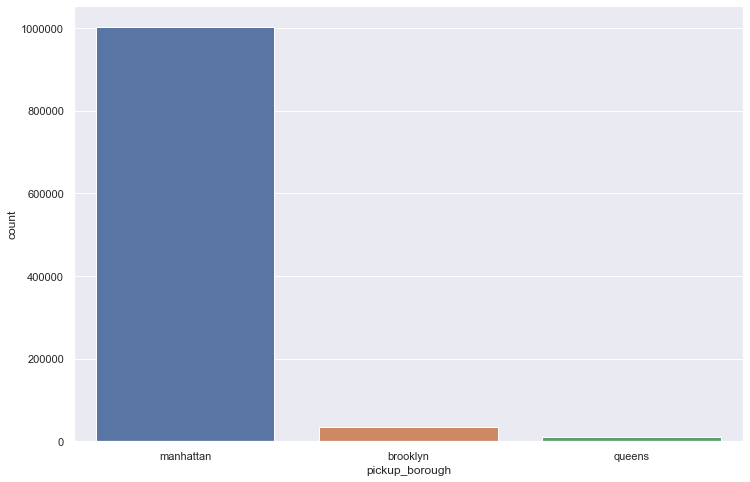

In [119]:
sns.countplot(df['pickup_borough'])

<font color = 'green' size = '3'> From the above plot, we see that <b> Manhattan </b> has the highest service usage.

<font color = 'green' size = '3'><b>3. How long are most of the users travelling?

<font color = 'green' size = '3'> We have binned the trip duration to - Normal trips(0-30 mins),Extended Trips(31 - 60 mins) and Long trips(61-max).<br>

In [120]:
bins = [df['tripduration'].min(),30,60,df['tripduration'].max()]
labels=['Normal trips','Extended Trips','Long Trips']
df['trip_duration_type'] = pd.cut(df.age,bins,labels=labels)

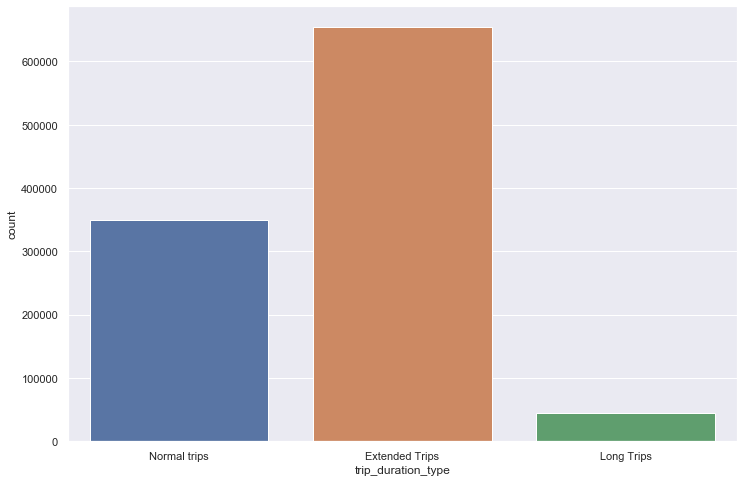

In [121]:
sns.countplot(df['trip_duration_type'])

<font color = 'green' size = '3'>Based on the above plot, we have <b>Extended trips</b> as the highest usage.<br>

<font color = 'green' size = '3'>Which gender uses the service adequately?

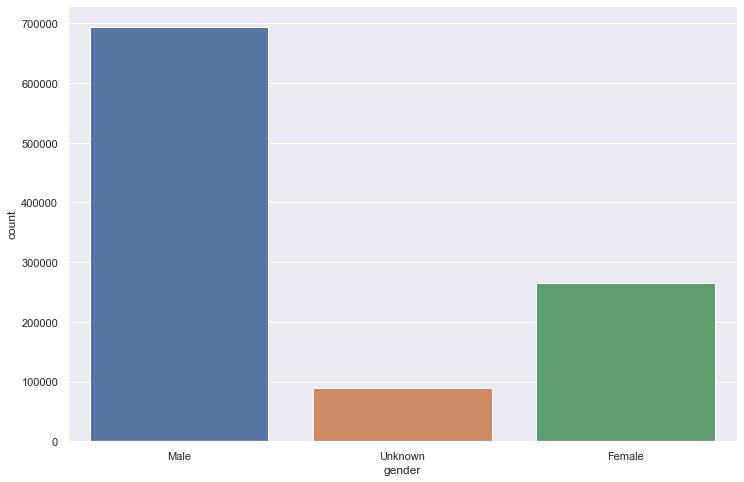

In [122]:
sns.countplot(df['gender'])

<font color = 'green' size = '3'>From the above plot it can be seen that <b>"Male"</b> use the service more adequately

<font color = 'green' size = '3'>Which age group has highest usage?

In [123]:
bins = [df['age'].min(),30,45,df['age'].max()]

labels=['Young Adults','Middle Aged Adults','Old Adults']
df['age_group'] = pd.cut(df.age,bins,labels=labels)

<font color = 'green' size = '3'>To analyze the highest usage based on age groups, we have binned the featured engineered column "age" into three sub-age groups namely: between min age to 30 as Young Adults, between 31 to 45 as Middle Age Adults and between 46 to max-age as Old Adults.

In [124]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,usertype,birth year,gender,trip_distance,age,pickup_borough,dropoff_borough,trip_duration_type,age_group
0,5.450,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,Subscriber,1968,Male,0.417659,51,manhattan,manhattan,Extended Trips,Old Adults
1,19.083,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,Customer,1969,Unknown,1.322852,50,manhattan,manhattan,Extended Trips,Old Adults
2,21.550,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,Customer,1969,Unknown,1.587362,50,manhattan,manhattan,Extended Trips,Old Adults
3,29.217,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,Subscriber,1990,Male,1.299336,29,manhattan,manhattan,Normal trips,Young Adults
4,10.217,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,Subscriber,1992,Male,1.113123,27,manhattan,manhattan,Normal trips,Young Adults


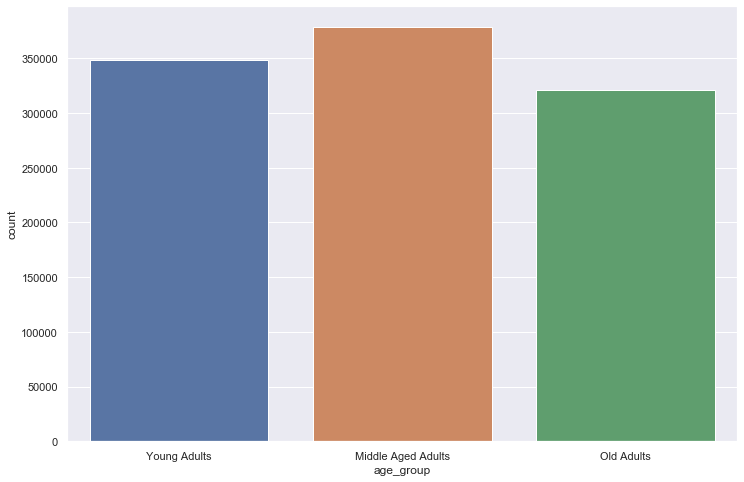

In [125]:
sns.countplot(df['age_group'])

<font color = 'green' size = '3'>From the above plot it can be seen that the <b>Middle aged adults</b> have the highest usage of the bikeshare service 

<font color = 'green' size = '3'>4. Which type of users has high trip duration?

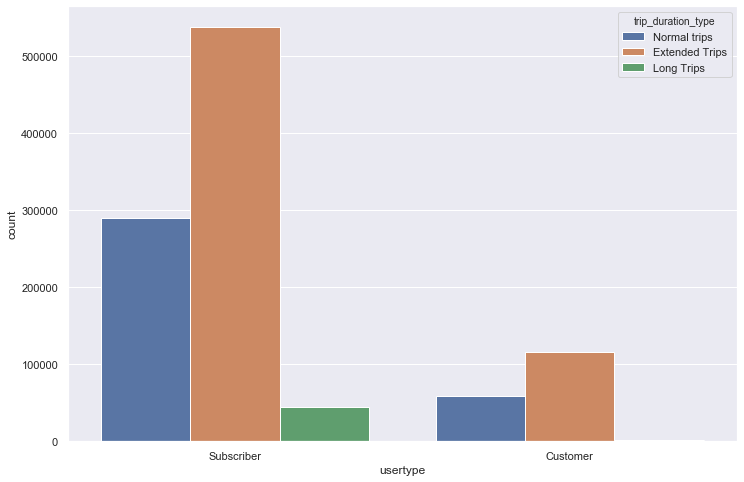

In [126]:
sns.countplot(df['usertype'], hue = df['trip_duration_type'])

<font color = 'green' size = '3'> <b>Subscriber</b> has the highest trip duration.

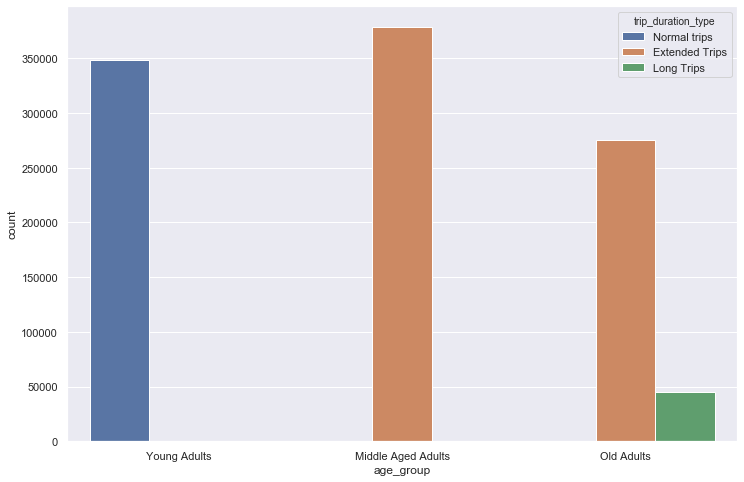

In [127]:
sns.countplot(df['age_group'], hue = df['trip_duration_type'])

<font color = 'green' size = '3'>The above plot is based on age group and trip duration type.From this we can analyze,that young adults majorly take the normal trips while the middle age take the extended trips and the old adults have their share majorly distributed in extended trips and some share in long trips.

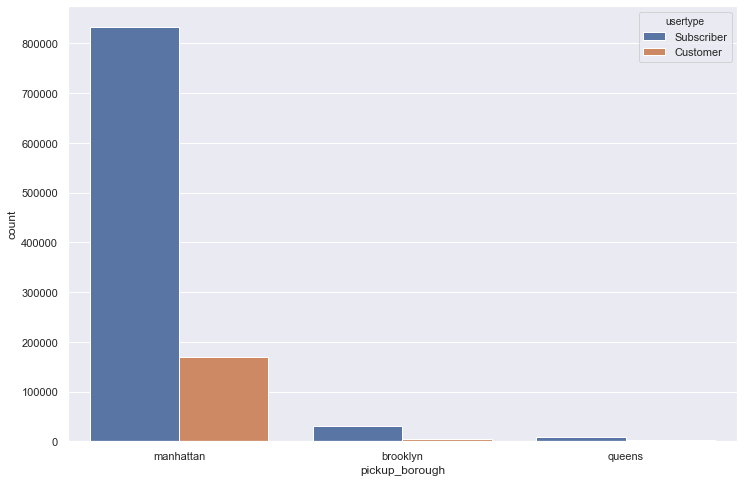

In [128]:
sns.countplot(df['pickup_borough'], hue = df['usertype'])

<font color = 'green' size = '3'>The above plot is based on pickup borough and user type.From the above plot we can analyze that in Manhattan people usually are subscribers than customers as it is the borough which majorly contributes to the  New York bikeshare service.In the other two boroughs also i.e Brooklyn and Queens people take subscription rather than just using it as a customer for a day or two.